In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
import numpy as np
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import statsmodels
import scipy
from scipy import stats
import seaborn as sns
from functools import reduce
from sklearn.svm import SVC
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from matplotlib import cm
from matplotlib.lines import Line2D
import matplotlib.patches as patches

In [2]:
df_labels = pd.read_csv('Ultimoslabels.csv')

In [3]:
df_labels.head()

,Unnamed: 0,start,deviceid,Tablet,Numero do Tablet ou Celular,Região,Olá! Estamos fazendo uma pesquisa para a USP e gostaria de saber se você pode responder a algumas questões. São apenas uns poucos minutos e você não precisa se identificar,Qual é a sua idade:,Sexo:,"Para começar, gostaria de saber, entre os partidos políticos brasileiros, com qual você se identifica? (não ler as opções)",...,mulheres,religiao_moral,lgbt,negros,labels_km,labels_km_std,relig_outro,scoreR,scoreP,scoreF
0,0,2019-09-28T14:27:52.709-03:00,354137091447294,Celular,4.0,Norte 1,NaN,26,masculino,nenhum,...,0.666667,1.0,0.00,0.000000,2,2,nenhuma,1,4,3
1,1,2019-09-28T14:35:04.127-03:00,354137091447294,Celular,4.0,Norte 1,NaN,18,feminino,nenhum,...,0.666667,1.0,1.00,0.666667,2,2,evangélica,-4,7,11
2,2,2019-09-28T15:05:21.254-03,dbbc1db3b68c4d69,GPoPAI,7.0,Leste 1,NaN,32,feminino,PT,...,0.333333,0.0,-0.25,0.333333,0,0,católica,0,2,2
3,3,2019-09-28T14:45:57.850-03,dbbc1db3b68c4d69,GPoPAI,7.0,Leste 1,NaN,27,feminino,nenhum,...,0.000000,0.0,-0.25,0.666667,0,0,evangélica,-1,-1,0
4,4,2019-09-28T14:54:11.394-03,dbbc1db3b68c4d69,GPoPAI,7.0,Leste 1,NaN,35,masculino,PT,...,-0.333333,0.0,0.00,0.333333,0,0,evangélica,3,3,0


In [18]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pd.get_dummies(df_labels.loc[:, 'R1':'P11']))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['labels'] = df_labels.labels_km

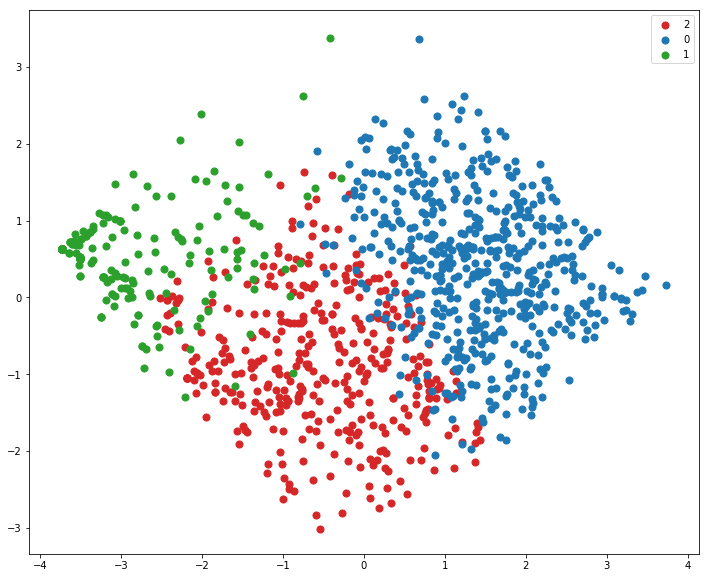

In [20]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
targets = principalDf.labels.unique()
colors = ['tab:red', 'tab:blue', 'tab:green']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['labels'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50, label = target)
plt.legend()
#plt.savefig('Cluster.png', dpi=300)

In [48]:
dfs = [df_labels[df_labels.idade=='16a24'],df_labels[df_labels.idade=='25a34'],df_labels[(df_labels.idade=='35a44') | (df_labels.idade=='45a54')], df_labels[(df_labels.idade=='55a64') | (df_labels.idade=='65mais')]]
cols = ['16a24','25a34', '35a54', '55mais']

In [50]:
dfs = [df_labels[df_labels.espec=='de esquerda'], df_labels[df_labels.espec=='de direita'], df_labels[df_labels.antipetista=='muito antipetista'], df_labels[df_labels.presidente=='Bolsonaro'], df_labels[df_labels.presidente=='Haddad'], df_labels[df_labels.espec=='nada disso'], df_labels[df_labels.partido=='PT'], df_labels[df_labels.partido=='PSOL'], df_labels[df_labels.espec=='Centro']]
cols = ['Esquerda', 'Direita', 'Antipetismo', 'Bolsonaristas', 'Haddad', 'Nada disso', 'PT', 'PSOL', 'Centro']


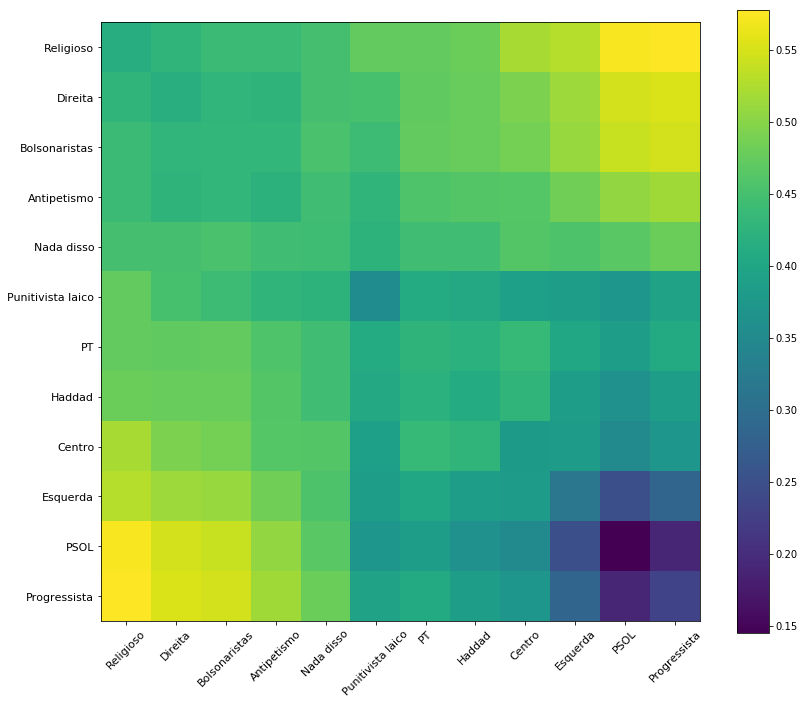

In [51]:
a = main(dfs, cols, False, '-Todas-Final')

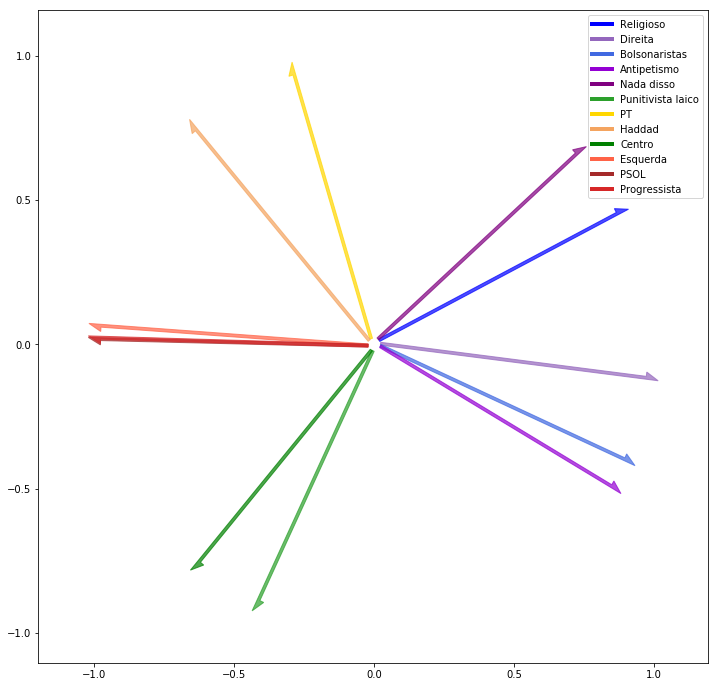

In [58]:
plot_eixos(pca(a), False, '-Todos-Final')

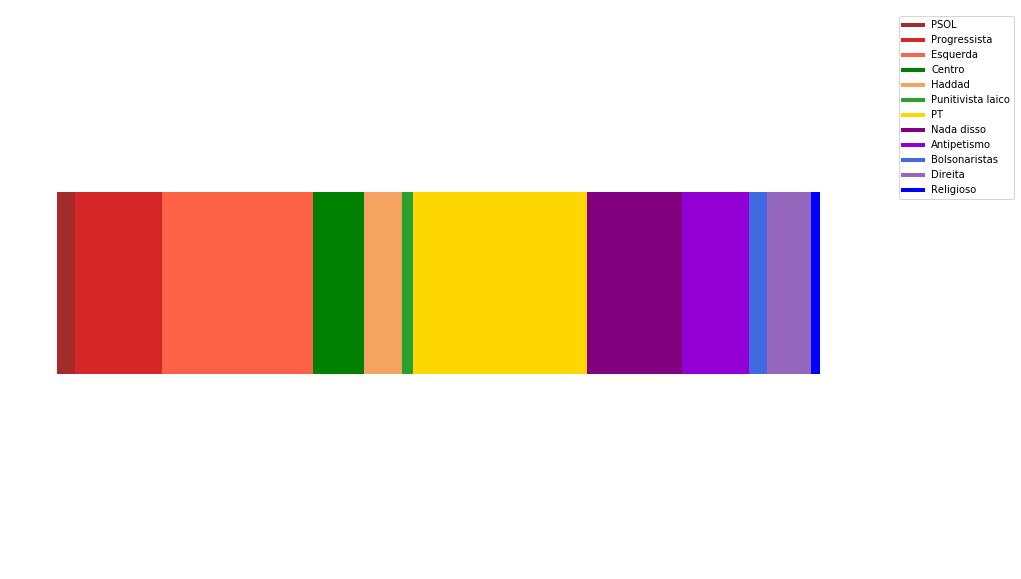

In [65]:
b = linear_espec(a, False, '1224')

In [ ]:
def get_dum (df):
    return  pd.geta_dummies(df[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11','P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10','P11']])

In [325]:
def plot_eixos2(a, savefig, title):
    recortes = ['Religioso','Bolsonaristas', 'Direita', 'Antipetismo',  'Nada disso', 'Punitivista laico','PT', 'Haddad', 'Esquerda','PSOL', 'Progressista', '16a24','25a34','35a54', '55mais', 'Centro']
    colors =['blue', 'royalblue', 'tab:purple', 'darkviolet', 'purple', 'tab:green', 'gold', 'sandybrown', 'tomato', 
        'brown', 'tab:red', 'pink','y','tab:orange', 'darkorchid', 'g']
    cores = pd.DataFrame([colors], columns = recortes)
    
    max_arrow_width=0.02
    arrow_h_offset = 0.35  
    arrow_sep=0.1
    max_arrow_length = 1 - 2 * arrow_h_offset
    max_head_width = 2.5 * max_arrow_width
    max_head_length = 2.2 * max_arrow_width
    size=5
    display='length'
    shape='right'
    
    head_width = max_head_width
    width = max_arrow_width
    head_width = max_head_width
    head_length = max_head_length
    

    head_starts_at_zero=True
    arrow_params = {'length_includes_head': True, 'shape': shape,
                        'head_starts_at_zero': head_starts_at_zero}
    plt.subplots(figsize=(12,12))
    
    plt.xlim(a['principal component 1'].min()-0.2, a['principal component 1'].max()+0.2)
    plt.ylim(a['principal component 2'].min()-0.2, a['principal component 2'].max()+0.2)
    for i in range(len(a.iloc[:,:-1].values)):
        plt.arrow(0, 0,a.values[i][0], a.values[i][1], label =a.values[i][2], color = cores[a.values[i][2]].values[0], alpha=.7, width=width,
                  head_width=head_width, head_length=head_length,
                  **arrow_params)
    circle = plt.Circle((0,0), 1.025, color='black', fill=False)
    ax=plt.gca()
    ax.add_patch(circle)
    custom_lines = [Line2D([0], [0],color=cores[a.values[i][2]].values[0], lw=4) for i in range(len(a.values))]
    plt.legend(custom_lines, a.names.values)
    if (savefig):
        plt.savefig('Eixos'+title+'.png', dpi=300)


In [ ]:
def pesos_colu (df1, df):
    df1['pesos'] = df['pesos']
    return df1

In [ ]:
def get_dfs_dum(dfs):
    return [pesos_colu(get_dum(df),df) for df in get_dfs_pesos(dfs)]
    #return [pesos_colu(dfs[i], dfs_pesos[i]) for i in range(len(dfs))]

In [ ]:
def get_dfs_pesos(dfs):
    a = [df_labels[df_labels.labels_km==0],df_labels[df_labels.labels_km==1], df_labels[df_labels.labels_km==2]]
    for df in dfs:
        a.append(df)
    return a

In [ ]:
def clean_dum(df):
    if (df.shape[1]<67):
        a = pd.DataFrame(np.zeros((df.shape[0], 67)))
        a.columns = ['R1_concorda', 'R1_não concorda', 'R1_não sei', 'R2_concorda',
           'R2_não concorda', 'R2_não sei', 'R3_concorda', 'R3_não concorda',
           'R3_não sei', 'R4_concorda', 'R4_não concorda', 'R4_não sei',
           'R5_concorda', 'R5_não concorda', 'R5_não sei', 'R6_concorda',
           'R6_não concorda', 'R6_não sei', 'R7_concorda', 'R7_não concorda',
           'R7_não sei', 'R8_concorda', 'R8_não concorda', 'R8_não sei',
           'R9_concorda', 'R9_não concorda', 'R9_não sei', 'R10_concorda',
           'R10_não concorda', 'R10_não sei', 'R11_concorda', 'R11_não concorda',
           'R11_não sei', 'P1_concorda', 'P1_não concorda', 'P1_não sei',
           'P2_concorda', 'P2_não concorda', 'P2_não sei', 'P3_concorda',
           'P3_não concorda', 'P3_não sei', 'P4_concorda', 'P4_não concorda',
           'P4_não sei', 'P5_concorda', 'P5_não concorda', 'P5_não sei',
           'P6_concorda', 'P6_não concorda', 'P6_não sei', 'P7_concorda',
           'P7_não concorda', 'P7_não sei', 'P8_concorda', 'P8_não concorda',
           'P8_não sei', 'P9_concorda', 'P9_não concorda', 'P9_não sei',
           'P10_concorda', 'P10_não concorda', 'P10_não sei', 'P11_concorda',
           'P11_não concorda', 'P11_não sei', 'pesos']
        for col in df.columns:
            a[col] = np.array(df[col])
        return a
    elif(df.shape[1]==67):
        return df

In [ ]:
def get_data(dfs):
    data = []
    for i in range(len(dfs)):
        linha = []
        for df in dfs:
            linha.append(np.average(np.average(cosine_distances(dfs[i].iloc[:, :-1], df.iloc[:,:-1]), weights = df.pesos, axis=1), weights = dfs[i].pesos))
        data.append(linha) 
    return data

In [ ]:
def reorder(data, names):
    cols = ['Religioso', 'Progressista', 'Punitivista laico']
    for name in names:
        cols.append(name)
    data_cos = pd.DataFrame(data, columns = cols)
    data_cos.index = np.arange(0, data_cos.shape[0], 1).astype('str')
    return data_cos.sort_values(by='Religioso').sort_values(by='0', axis=1)


In [ ]:
def heatmap(data_cos, savefig, title):
    fig, ax = plt.subplots(figsize=(12,10))
    norm = cm.colors.Normalize(vmax=abs(data_cos.values).max(), vmin=-abs(data_cos.values).max())
    cmap = 'viridis'
    im = ax.imshow(data_cos, cmap=cmap)
    ax.set_xticks(np.arange(len(data_cos.columns)))
    ax.set_yticks(np.arange(len(data_cos.columns)))
    if (len(data_cos.columns)>8):
        ax.set_xticklabels(data_cos.columns, fontsize=11, rotation='45')
    else:
        ax.set_xticklabels(data_cos.columns, fontsize=11)
    ax.set_yticklabels(data_cos.columns, fontsize=11)
    fig.colorbar(im, ax=ax)
    fig.tight_layout()
    
    if(savefig):
        plt.savefig('HeatMap'+title+'.png', dpi=300)
        

In [ ]:
def pca(data_cos):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data_cos)
    
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    a = principalDf.div(np.sqrt(principalDf['principal component 1']**2+principalDf['principal component 2']**2), axis=0)
    
    a['principal component 1'] = a['principal component 1']*-1
    a['names'] = data_cos.columns
    return a

In [ ]:
def plot_eixos(a, savefig, title):
    recortes = ['Religioso','Bolsonaristas', 'Direita', 'Antipetismo',  'Nada disso', 'Punitivista laico','PT', 'Haddad', 'Esquerda','PSOL', 'Progressista', '16a24','25a34','35a54', '55mais', 'Centro']
    colors =['blue', 'royalblue', 'tab:purple', 'darkviolet', 'purple', 'tab:green', 'gold', 'sandybrown', 'tomato', 
        'brown', 'tab:red', 'pink','y','tab:orange', 'darkorchid', 'g']
    cores = pd.DataFrame([colors], columns = recortes)
    
    max_arrow_width=0.02
    arrow_h_offset = 0.35  
    arrow_sep=0.1
    max_arrow_length = 1 - 2 * arrow_h_offset
    max_head_width = 2.5 * max_arrow_width
    max_head_length = 2.2 * max_arrow_width
    size=5
    display='length'
    shape='right'
    
    head_width = max_head_width
    width = max_arrow_width
    head_width = max_head_width
    head_length = max_head_length
    

    head_starts_at_zero=True
    arrow_params = {'length_includes_head': True, 'shape': shape,
                        'head_starts_at_zero': head_starts_at_zero}
    plt.subplots(figsize=(12,12))
    plt.xlim(a['principal component 1'].min()-0.2, a['principal component 1'].max()+0.2)
    plt.ylim(a['principal component 2'].min()-0.2, a['principal component 2'].max()+0.2)
    for i in range(len(a.iloc[:,:-1].values)):
        plt.arrow(0, 0,a.values[i][0], a.values[i][1], label =a.values[i][2], color = cores[a.values[i][2]].values[0], alpha=.7, width=width,
                  head_width=head_width, head_length=head_length,
                  **arrow_params)
        
    custom_lines = [Line2D([0], [0],color=cores[a.values[i][2]].values[0], lw=4) for i in range(len(a.values))]
    plt.legend(custom_lines, a.names.values)
    if (savefig):
        plt.savefig('Eixos'+title+'.png', dpi=300)

In [ ]:
def plot_eixos2(a, savefig, title):
    recortes = ['Religioso','Bolsonaristas', 'Direita', 'Antipetismo',  'Nada disso', 'Punitivista laico','PT', 'Haddad', 'Esquerda','PSOL', 'Progressista', '16a24','25a34','35a54', '55mais', 'Centro']
    colors =['blue', 'royalblue', 'tab:purple', 'darkviolet', 'purple', 'tab:green', 'gold', 'sandybrown', 'tomato', 
        'brown', 'tab:red', 'pink','y','tab:orange', 'darkorchid', 'g']
    cores = pd.DataFrame([colors], columns = recortes)
    
    max_arrow_width=0.02
    arrow_h_offset = 0.35  
    arrow_sep=0.1
    max_arrow_length = 1 - 2 * arrow_h_offset
    max_head_width = 2.5 * max_arrow_width
    max_head_length = 2.2 * max_arrow_width
    size=5
    display='length'
    shape='right'
    
    head_width = max_head_width
    width = max_arrow_width
    head_width = max_head_width
    head_length = max_head_length
    

    head_starts_at_zero=True
    arrow_params = {'length_includes_head': True, 'shape': shape,
                        'head_starts_at_zero': head_starts_at_zero}
    plt.subplots(figsize=(12,12))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    for i in range(len(a.iloc[:,:-1].values)):
        plt.arrow(0, 0,np, a.values[i][1], label =a.values[i][2], color = cores[a.values[i][2]].values[0], alpha=.7, width=width,
                  head_width=head_width, head_length=head_length,
                  **arrow_params)
        
    custom_lines = [Line2D([0], [0],color=cores[a.values[i][2]].values[0], lw=4) for i in range(len(a.values))]
    plt.legend(custom_lines, a.names.values)
    if (savefig):
        plt.savefig('Eixos'+title+'.png', dpi=300)

In [ ]:
def linear_espec(data_cos, savefig, title):
    
    pca = PCA(n_components=1)
    principalComponents = pca.fit_transform(data_cos)
    fig, ax = plt.subplots(figsize=(15,10))
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
    a = principalDf
    a['principal component 1'] = a['principal component 1']*-1
    a['names'] = data_cos.columns
    a = a.sort_values(by='principal component 1', ascending=True)
    plt.xlim(a['principal component 1'].min(), a['principal component 1'].max()+0.1)
    plt.ylim(-0.003, 0.00)
    i=1
    for i in range(len(a['principal component 1'].values)-1):
        vec  = a['principal component 1'].values
        name = a.names.values[i]
        rect = patches.Rectangle((vec[i], -.002),vec[i+1]-vec[i], 0.001,linewidth=1,\
                                 facecolor=cores[name].values[0])
    
        ax.add_patch(rect)
        
    rect = patches.Rectangle((a['principal component 1'].values[-1], -.002),0.01, 0.001,linewidth=1,\
                                 facecolor=cores['Religioso'].values[0])
    
    ax.add_patch(rect)
    
    plt.axis('off')
    custom_lines = [Line2D([0], [0],color=cores[a.values[i][-1]].values[0], lw=4) for i in range(len(a.values))]
    plt.legend(custom_lines, a.names.values, bbox_to_anchor=(1, 1))
    if (savefig):
        plt.savefig('Linear-'+title+'png', dpi=300)
    return a

In [ ]:
def main(dfs, cols, savefig, title):
    dfs_pesos = get_dfs_pesos(dfs)
    dfs_dum = get_dfs_dum(dfs)
    dfs_dum = [clean_dum(df) for df in dfs_dum]
    heatmap(reorder(get_data(dfs_dum), cols), savefig, title)
    return reorder(get_data(dfs_dum), cols)

In [416]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

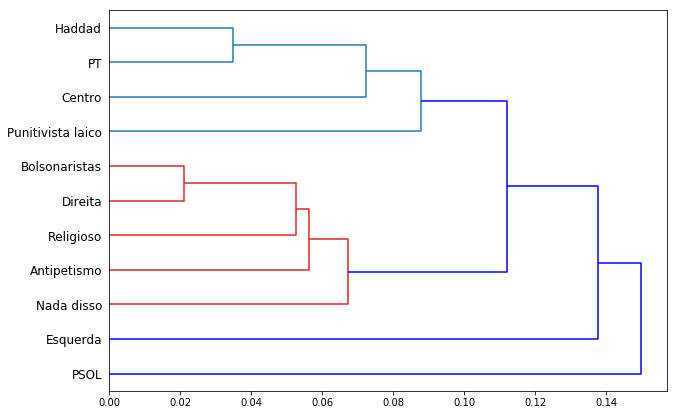

In [482]:
linked = linkage(dists, 'single')

labelList = range(1, len(a.columns)+1)
colors = np.repeat('red',15)
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='right',
            labels=dists.columns,
            distance_sort='descending',
            show_leaf_counts=False)
plt.show()